# Knowledge extraction from conceptual models

## Setup

In this notebook, we demonstrate how to use our models to detect graphical representations of (latent) variables and path coefficients in a given PDF file. The outputs of our functions will be saved in two different folders ```cropped_imgs``` (for extracted conceptual model figures) and ```final_imgs``` (detections of variables and coefficients in the figures). Before we can start, we need to set a few things up. <br>
First, we have to mount our Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Second, we have to install two dependencies to convert each page of a PDF into an image file:

In [2]:
!apt-get install poppler-utils 
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


Third, we ensure that we are in the correct directory (i.e., adjust the first line to the path of your darknet directory). Furthermore, we have to build the darknet files needed for the object detection models.

In [3]:
%cd /content/drive/MyDrive/ICIS_Paper/darknet

# Commands to install darknet/yolov4
!sudo apt install dos2unix
!make
!chmod +x ./darknet
!./build.sh

/content/drive/MyDrive/ICIS_Paper/darknet
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dos2unix is already the newest version (7.3.4-3).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
chmod +x *.sh
nvcc -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_50,code=[sm_50,compute_50] -gencode arch=compute_52,code=[sm_52,compute_52] -gencode arch=compute_61,code=[sm_61,compute_61] -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN --compiler-options "-Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include" -c ./src/convolutional_kernels.cu -o obj/convolutional_kernels.o
nvcc fatal   : Unsupported gpu architecture 'compute_30'
Makefile:177: recipe for target 'obj/convolutional_kernels.o' failed
make: *** [obj/co

Finally, we download our model weights to our current directory.

In [4]:
!wget --output-document=fig_det.weights https://sync.academiccloud.de/index.php/s/U13SnHdpPAnPKI0/download
!wget --output-document=var_det.weights https://sync.academiccloud.de/index.php/s/RBm4jpUvxzwQOAu/download
!wget --output-document=sem_class.h5 https://sync.academiccloud.de/index.php/s/excRqLnqE5xN4fM/download

--2021-04-22 12:58:45--  https://sync.academiccloud.de/index.php/s/U13SnHdpPAnPKI0/download
Resolving sync.academiccloud.de (sync.academiccloud.de)... 134.76.23.42
Connecting to sync.academiccloud.de (sync.academiccloud.de)|134.76.23.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256037520 (244M) [application/octet-stream]
Saving to: ‘fig_det.weights’

fig_det.weights     100%[===================>] 244.18M  6.96MB/s    in 19s     

2021-04-22 12:59:05 (13.2 MB/s) - ‘fig_det.weights’ saved [256037520/256037520]

--2021-04-22 12:59:05--  https://sync.academiccloud.de/index.php/s/RBm4jpUvxzwQOAu/download
Resolving sync.academiccloud.de (sync.academiccloud.de)... 134.76.23.42
Connecting to sync.academiccloud.de (sync.academiccloud.de)|134.76.23.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256059060 (244M) [application/octet-stream]
Saving to: ‘var_det.weights’

var_det.weights     100%[===================>] 244.20M  4.53MB/s    

## Inference

We created a python file which contains all of our wrapper functions. These functions will be used in the following, so we import them.

In [5]:
from detection_utils import *

We are converting all PDF pages into image files by using our function ```store_images```. These images will be stored in the ```temp_imgs``` folder. Then we run our ```classify_pages``` function which classifies each image (i.e., does it contain a graphical representation of a conceptual model or not) and keeps only the relevant pages in the ```temp_imgs``` folder.

In [6]:
# Enter the path to the pdf file
PATH_TO_PDF = 'test2.pdf'

store_images(PATH_TO_PDF)
classify_pages(model_path='sem_class.h5')

./temp_imgs/Page4.jpg
./temp_imgs/Page11.jpg
./temp_imgs/Page19.jpg
./temp_imgs/Page1.jpg
./temp_imgs/Page2.jpg
./temp_imgs/Page3.jpg
./temp_imgs/Page5.jpg
./temp_imgs/Page6.jpg
./temp_imgs/Page7.jpg
./temp_imgs/Page8.jpg
./temp_imgs/Page9.jpg
./temp_imgs/Page10.jpg
./temp_imgs/Page12.jpg
./temp_imgs/Page13.jpg
./temp_imgs/Page14.jpg
./temp_imgs/Page15.jpg
./temp_imgs/Page16.jpg
./temp_imgs/Page17.jpg
./temp_imgs/Page18.jpg
./temp_imgs/Page20.jpg
./temp_imgs/Page21.jpg
./temp_imgs/Page22.jpg
./temp_imgs/Page23.jpg
./temp_imgs/Page24.jpg
./temp_imgs/Page25.jpg
./temp_imgs/Page26.jpg
./temp_imgs/Page27.jpg
./temp_imgs/Page28.jpg
./temp_imgs/Page29.jpg
./temp_imgs/Page30.jpg
./temp_imgs/Page31.jpg
./temp_imgs/Page32.jpg


We pass the name/path of our weights to the ```detect_figures``` function. This function detects the SEM figures in the image files from ```temp_imgs```. The images are cropped to the size of each detection. These cropped images are stored in the ```cropped_imgs``` folder and can be used by databases to provide images of the conceptual models of a paper.

In [7]:
detect_figures(weights='fig_det.weights')

Processing image Page4
Processing image Page11
Processing image Page19


Our ```detect_variables``` functions uses the cropped images from the previous step to detect latent variables, items and path coefficients in the SEM figures. The resulting images are stored in the ```final_imgs``` folder. In the future, the bounding boxes will be used to extract the names via OCR and store this information in a database together with the intermediate images and the paper itself.

Processing image 0_Page4


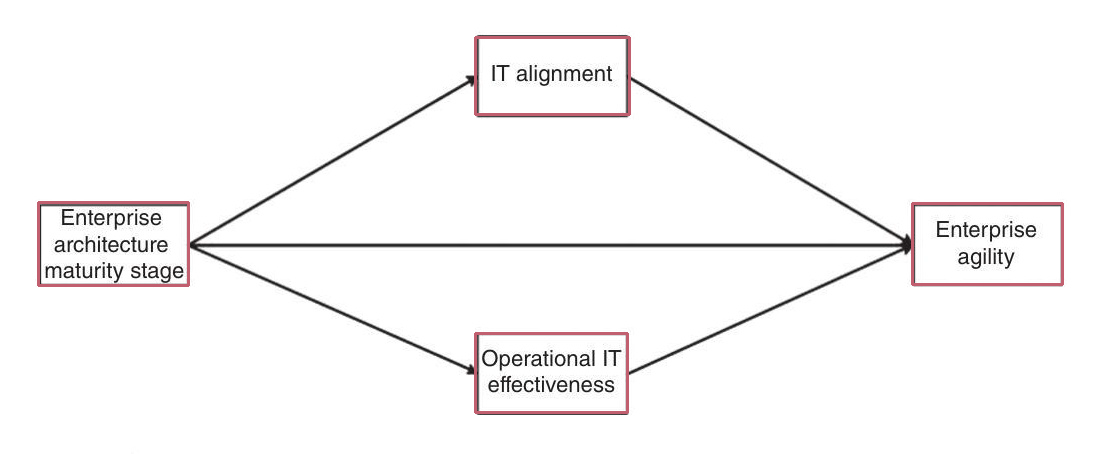

Processing image 0_Page11


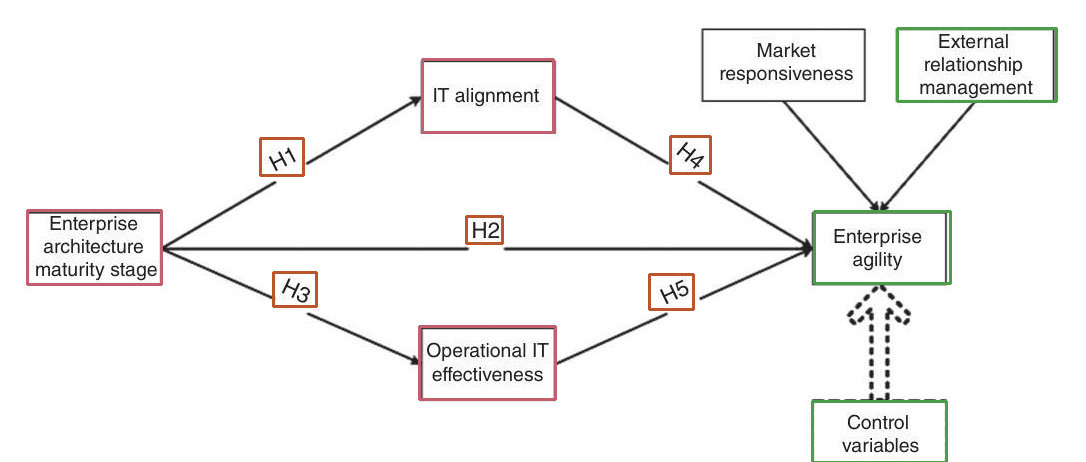

Processing image 0_Page19


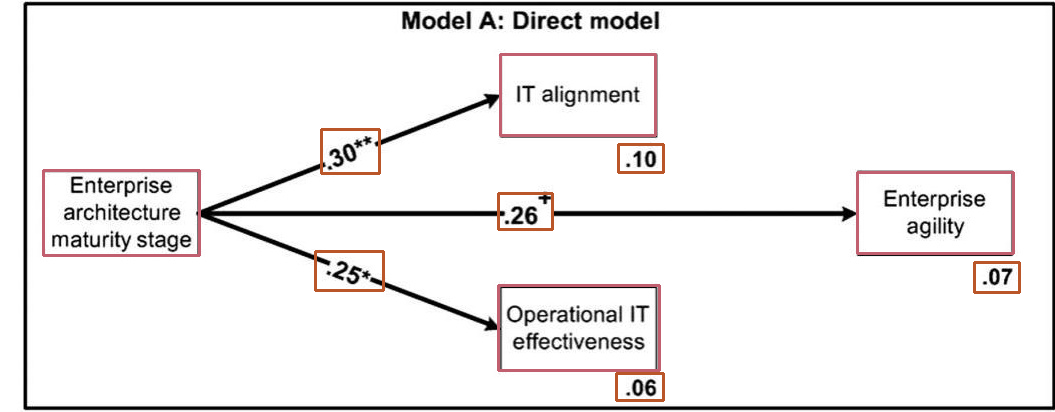

Processing image 1_Page19


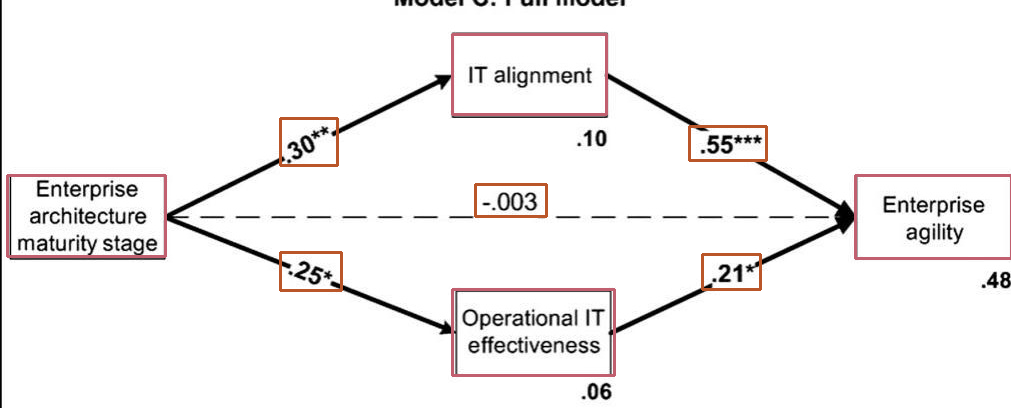

In [8]:
detect_variables(weights='var_det.weights')